# SUPPLY CHAIN ANALYSIS

The supply chain is the networks of production and logistics involved in producing and delivering goods to customers. And supply chain analysis means analyzing various components of a supply chain to understand how to imporve the effectiveness of the supply chain to create more value to the customer.

#### IMPORTING ALL REQUIRE LIBRARIES

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

plt.style.use('Solarize_Light2')

def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10, 
                ha="center", va='bottom')

#### IMPORTING DATASET

In [2]:
df = pd.read_csv("supply_chain_data.csv")

In [3]:
df.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

#### TRYING TO GET SOME BASIC INFORMATION OF DATASET

In [4]:
df.shape

(100, 24)

In [5]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [6]:
df.nunique()

Product type                 3
SKU                        100
Price                      100
Availability                63
Number of products sold     96
Revenue generated          100
Customer demographics        4
Stock levels                65
Lead times                  29
Order quantities            61
Shipping times              10
Shipping carriers            3
Shipping costs             100
Supplier name                5
Location                     5
Lead time                   29
Production volumes          96
Manufacturing lead time     30
Manufacturing costs        100
Inspection results           3
Defect rates               100
Transportation modes         4
Routes                       3
Costs                      100
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [8]:
obj =(df.dtypes=='object')
obj_col = list(obj[obj].index)

print("No. of columns that have dtype as an object :-  "+str(len(obj_col)))
print("are :- ",obj_col)
print("---------------------------------------------------------------------------------")

integer = (df.dtypes == "int64")
int_col = list(integer[integer].index)
print("No. of columns that have dtype as an integer :-  "+str(len(int_col)))
print("are :- ",int_col)
print("---------------------------------------------------------------------------------")

flt = (df.dtypes == "float64")
flt_col = list(flt[flt].index)
print("No. of columns that have dtype as an float :-  "+str(len(flt_col)))
print("are :- ",flt_col)
print("---------------------------------------------------------------------------------")

No. of columns that have dtype as an object :-  9
are :-  ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']
---------------------------------------------------------------------------------
No. of columns that have dtype as an integer :-  9
are :-  ['Availability', 'Number of products sold', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Lead time', 'Production volumes', 'Manufacturing lead time']
---------------------------------------------------------------------------------
No. of columns that have dtype as an float :-  6
are :-  ['Price', 'Revenue generated', 'Shipping costs', 'Manufacturing costs', 'Defect rates', 'Costs']
---------------------------------------------------------------------------------


In [9]:
for i in obj_col:
    print(f"{i} :- ",df[i].nunique())

Product type :-  3
SKU :-  100
Customer demographics :-  4
Shipping carriers :-  3
Supplier name :-  5
Location :-  5
Inspection results :-  3
Transportation modes :-  4
Routes :-  3


In [10]:
df.describe()

Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0.000000    1.000000          1.000000        1.000000   
25%       16.750000    8.000000         26.000000        3.750000   
50%       47.500000   17.000000         52.000000        6.000000   
75%       73.000000   24.000000         71.250000        8.000000   
max      100.000000   30.000000         96.000000       10.000000   

       Shipping costs   Lead time  Production volumes  \
count      100.000000  100.000000          100.000000   
mean         5.548149   17.080000          567.840000   
std          2.651376    8.846251          263.046861   
min          1.013487    1.000000          104.000000   
25%          3.540248   10.000000          352.000000   
50%          5.320534   18.000000          568.500000   
75%          7.601695   25.000000          797.000000   
max          9.929816   30.000000          985.000000   

       Manufacturing lead time  Manufacturing costs  Defect rates       Costs  
count                100.00000           100.000000    100.000000  100.000000  
mean                  14.77000            47.266693      2.277158  529.245782  
std                    8.91243            28.982841      1.461366  258.301696  
min                    1.00000             1.085069      0.018608  103.916248  
25%                    7.00000            22.983299      1.009650  318.778455  
50%                   14.00000            45.905622      2.141863  520.430444  
75%                   23.00000            68.621026      3.563995  763.078231  
max                   30.00000            99.466109      4.939255  997.413450

#### ANALYZING PRODUCT TYPE PARAMETER

In [11]:
df['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

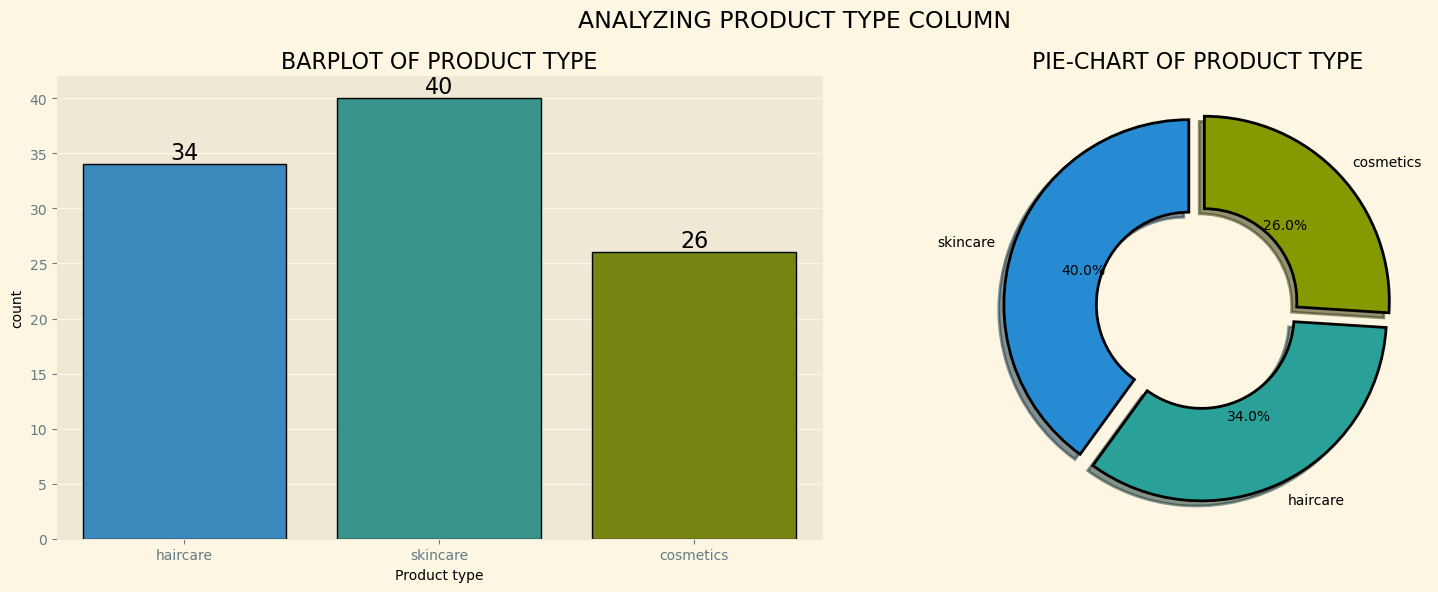

In [12]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=df, x='Product type',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)
ax[0].set_title("BARPLOT OF PRODUCT TYPE")   
ax[1].pie(x=df['Product type'].value_counts(),
          labels=df['Product type'].value_counts().index,
         explode=[0.05, 0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF PRODUCT TYPE")

plt.suptitle("ANALYZING PRODUCT TYPE COLUMN", size=17)
plt.tight_layout()
plt.show()

#### ANALYZING CUSTOMER DEMOGRAPHICS

In [13]:
df['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

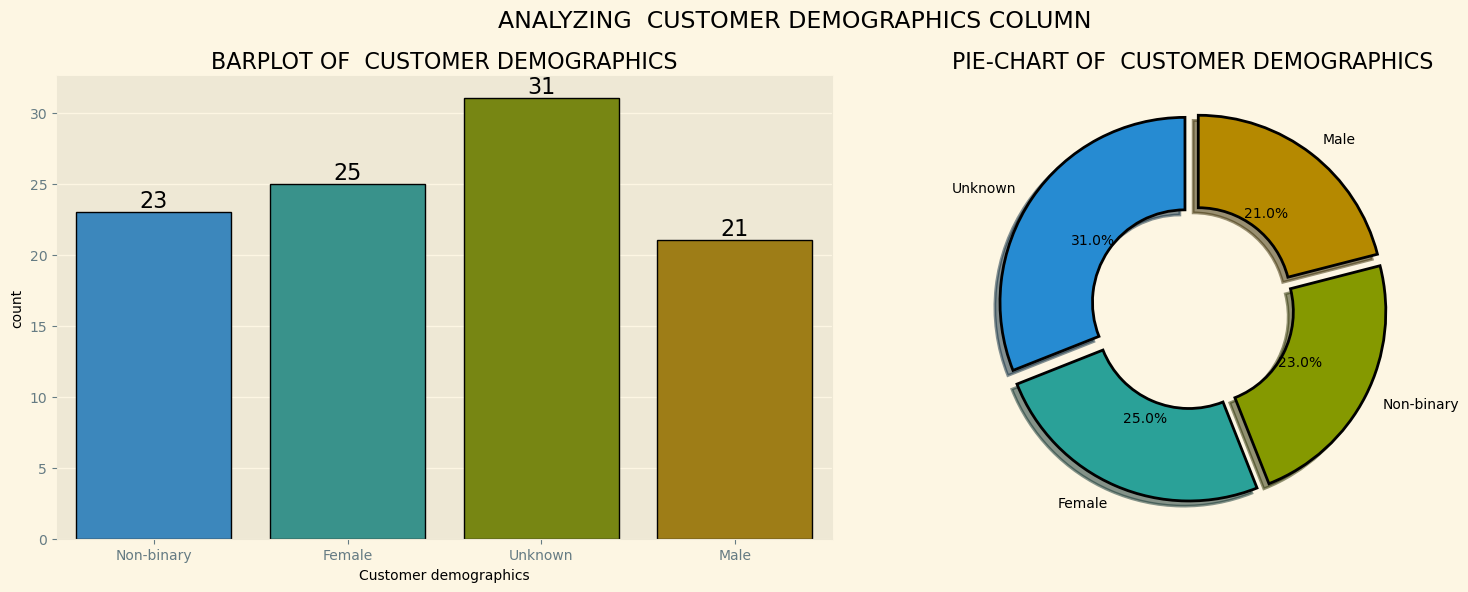

In [14]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=df, x='Customer demographics',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)
ax[0].set_title("BARPLOT OF  CUSTOMER DEMOGRAPHICS")   
ax[1].pie(x=df['Customer demographics'].value_counts(),
          labels=df['Customer demographics'].value_counts().index,
         explode=[0.05, 0.05, 0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF  CUSTOMER DEMOGRAPHICS")

plt.suptitle("ANALYZING  CUSTOMER DEMOGRAPHICS COLUMN", size=17)
plt.tight_layout()
plt.show()

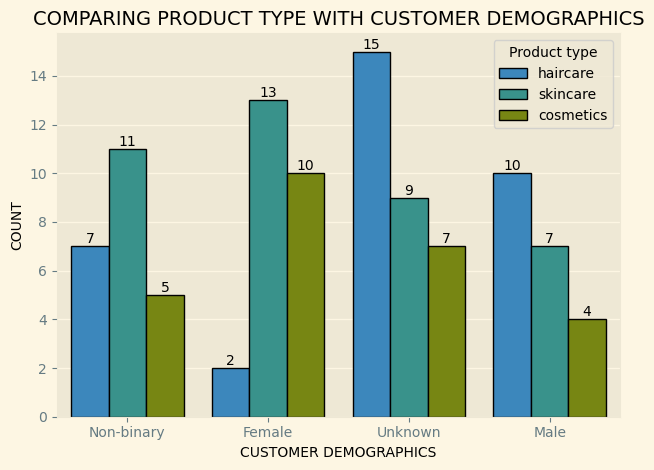

In [15]:
sns.countplot(data=df, x='Customer demographics', hue = 'Product type', edgecolor='black')
ax = plt.gca()
add_bar_labels(ax)
plt.xlabel("CUSTOMER DEMOGRAPHICS")
plt.ylabel("COUNT")
plt.title("COMPARING PRODUCT TYPE WITH CUSTOMER DEMOGRAPHICS", fontsize=14)
plt.tight_layout()
plt.show()

From this we get to know that unknown and male are using more haircare product than non-binary ans female and vice varsa in case of skincare product

In [16]:
fig = px.scatter(df, x='Price', y='Revenue generated', 
                color = 'Product type', size='Number of products sold', 
                hover_data=['Number of products sold'], trendline='ols')
fig.update_layout(title = "SCATTERPLOT WITH TRENDLINES")
fig.show()

CONCLUSION:- 

    1. As the price of skincare product increases the revenue generated form that skincare product also increases.
    2. In case of cosmetics, if the price of product increases the revenue decreases
    3. In case of haircare, the revenue is not that dependant on price

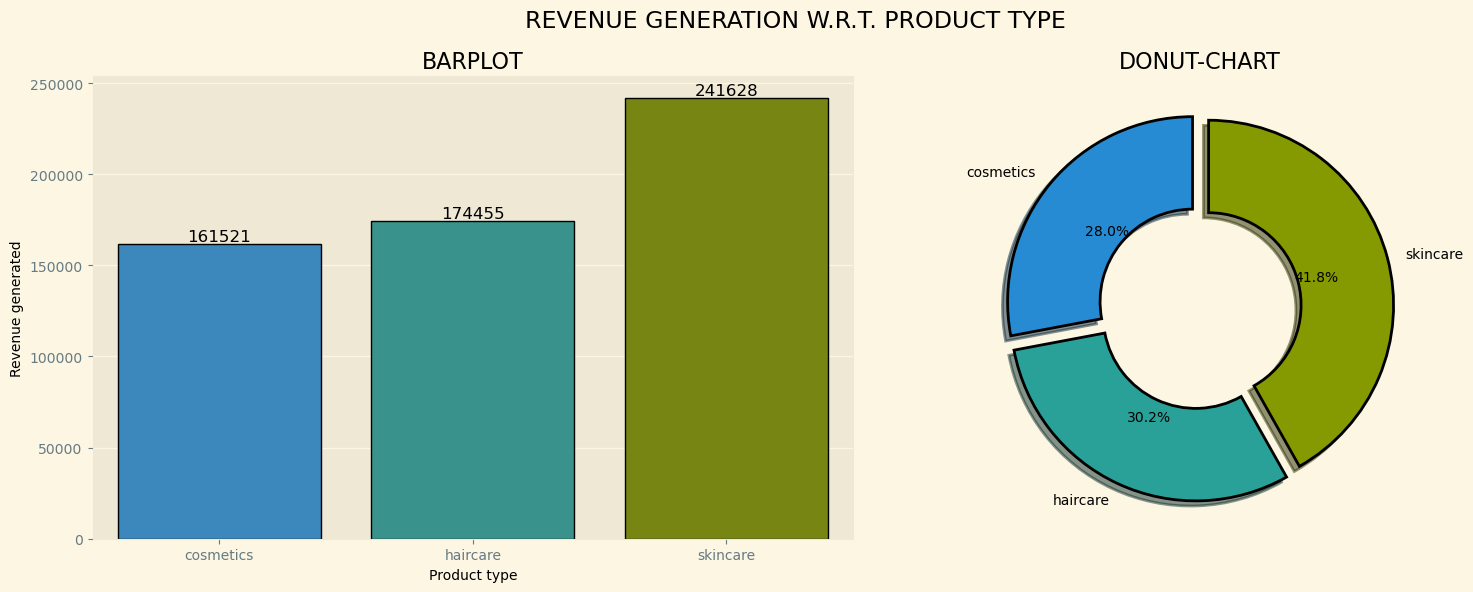

In [17]:
total_revenue = df.groupby('Product type')['Revenue generated'].sum().reset_index()

f, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.barplot(data=total_revenue, x='Product type', y='Revenue generated', edgecolor='black', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12,  fmt='%.0f')
ax[0].set_title("BARPLOT")

ax[1].pie(x=total_revenue['Revenue generated'],
         labels = total_revenue['Product type'],
         explode = [0.05, 0.05, 0.05],
         autopct='%1.1f%%',
         shadow=True,
         startangle=90, 
         wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5}
         )
ax[1].set_title("DONUT-CHART")

plt.suptitle("REVENUE GENERATION W.R.T. PRODUCT TYPE", fontsize=17)
plt.tight_layout()
plt.show()

CONCLUSION:-

    1. 28% revenue is generated form COSMATICS products.
    2. 30.2% revenue is generated form HAIRCARE products.
    3. 41.8% revenue is generated form SKINCARE products.

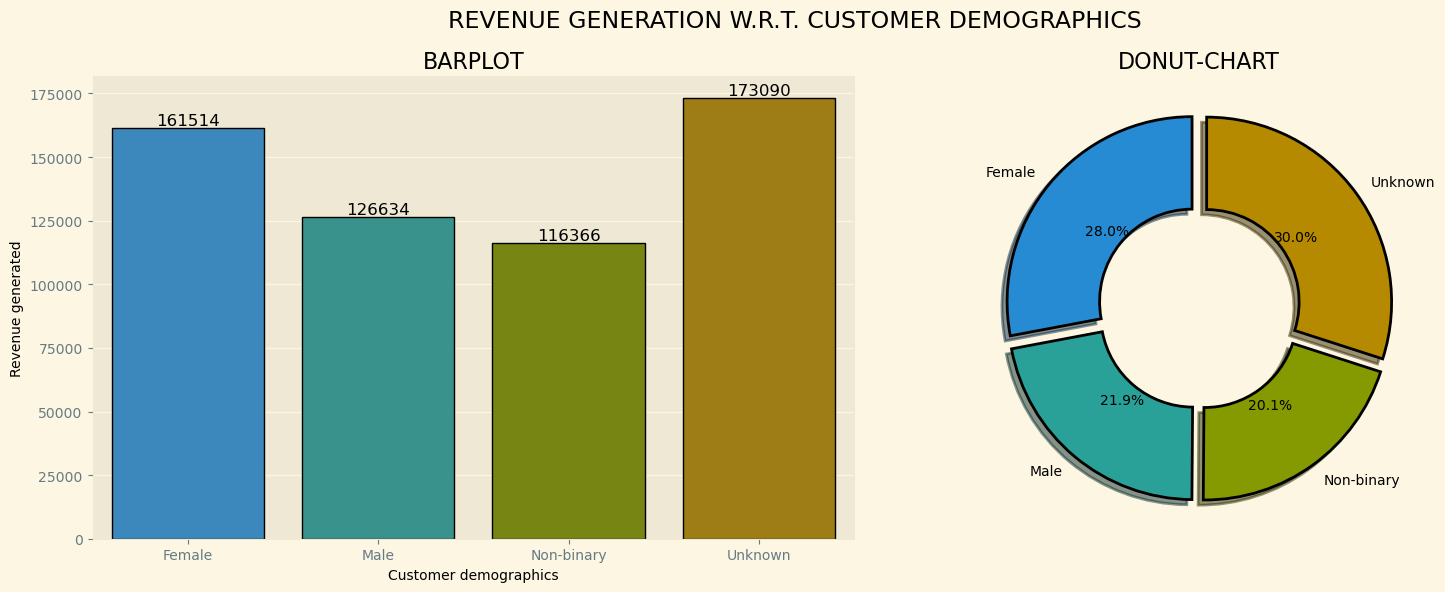

In [18]:
total_revenue = df.groupby('Customer demographics')['Revenue generated'].sum().reset_index()

f, ax = plt.subplots(1, 2, figsize = (16, 6))
sns.barplot(data=total_revenue, x='Customer demographics', y='Revenue generated', edgecolor='black', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12,  fmt='%.0f')
ax[0].set_title("BARPLOT")

ax[1].pie(x=total_revenue['Revenue generated'],
         labels = total_revenue['Customer demographics'],
         explode = [0.05, 0.05, 0.05, 0.05],
         autopct='%1.1f%%',
         shadow=True,
         startangle=90, 
         wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5}
         )
ax[1].set_title("DONUT-CHART")

plt.suptitle("REVENUE GENERATION W.R.T. CUSTOMER DEMOGRAPHICS", fontsize=17)
plt.tight_layout()
plt.show()

CONCLUSION:-

    1. 28% revenue is generated form FEMALE customer.
    2. 30% revenue is generated form UNKNOWN customer.
    3. 21.9% revenue is generated form MALE customer.
    4. 20.1% revenue is generated form NON-BINARY customer.

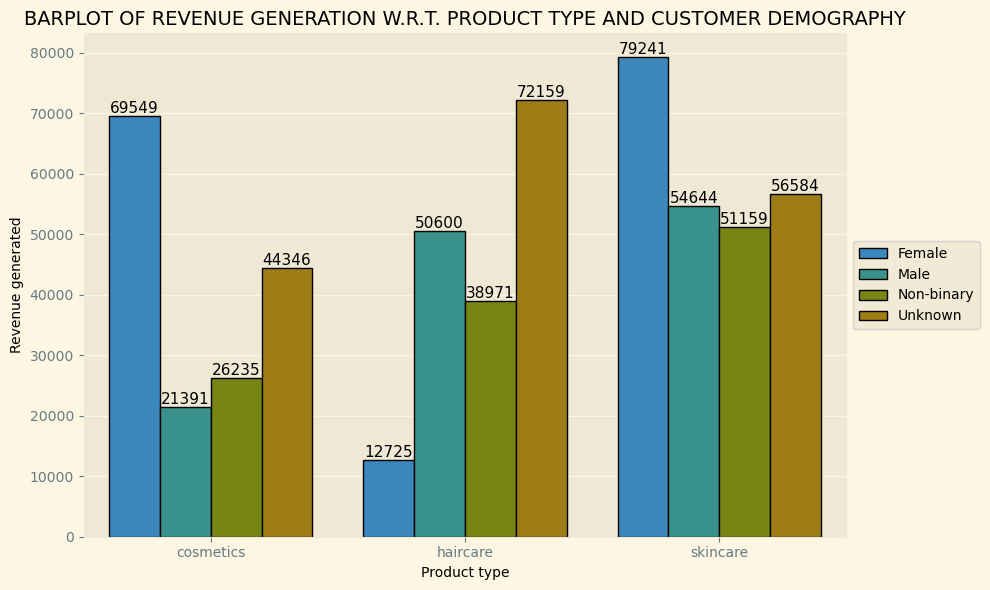

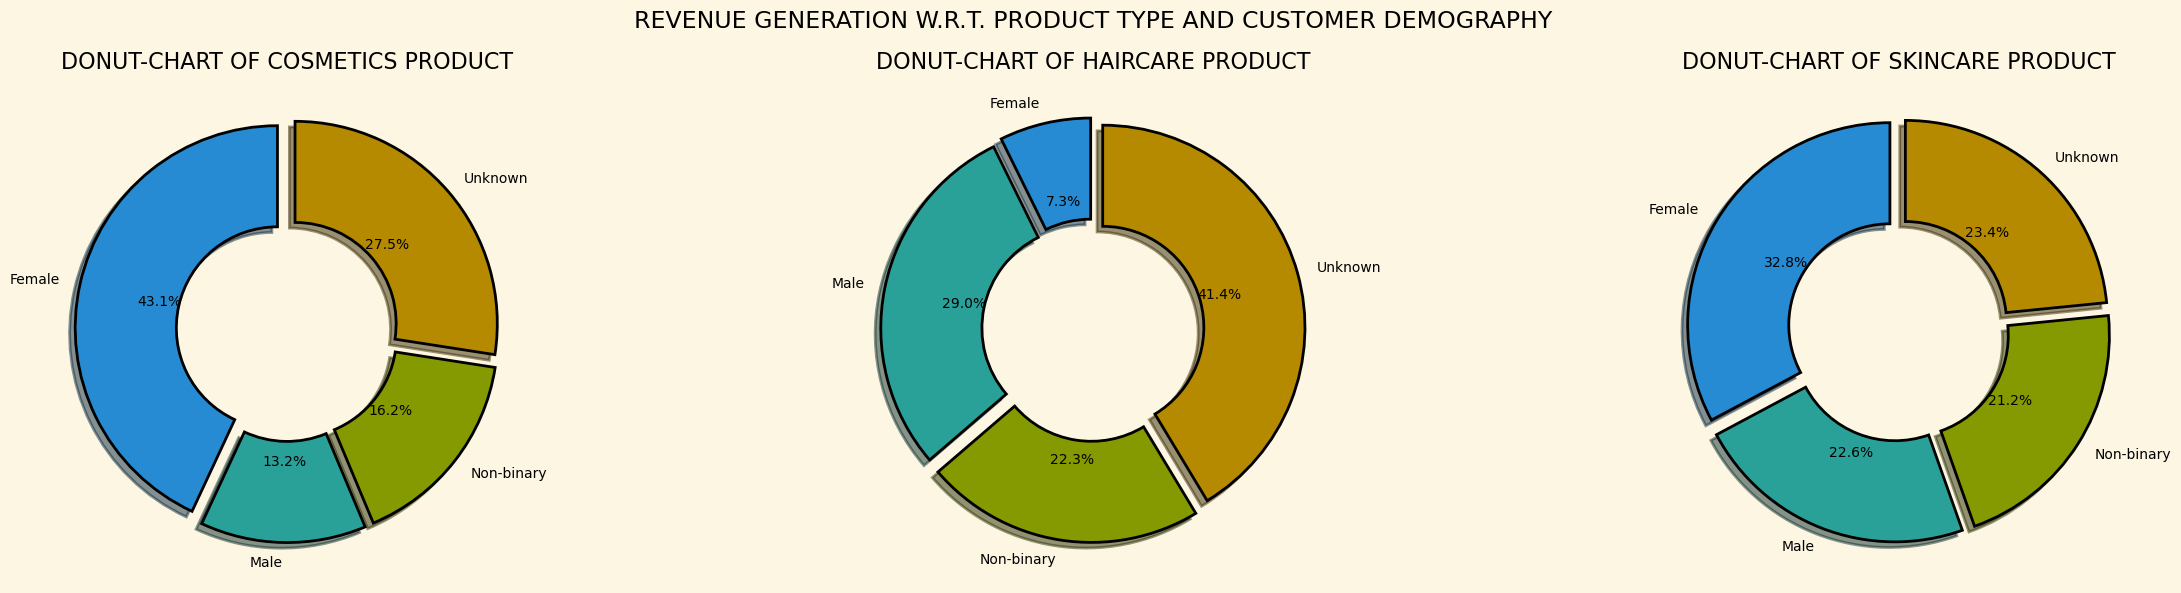

In [19]:
total_revenue = df.groupby(['Product type', 'Customer demographics'])['Revenue generated'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=total_revenue, x='Product type', y='Revenue generated', edgecolor='black', hue='Customer demographics')
for container in ax.containers:
    ax.bar_label(container, color='black', size=11,  fmt='%.0f')
ax.set_title("BARPLOT OF REVENUE GENERATION W.R.T. PRODUCT TYPE AND CUSTOMER DEMOGRAPHY", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()



f, ax = plt.subplots(1, 3, figsize = (25, 6))
product_revenue = total_revenue[total_revenue['Product type']=='cosmetics']
ax[0].pie(x=product_revenue['Revenue generated'],
         labels = product_revenue['Customer demographics'],
         explode = [0.05, 0.05, 0.05, 0.05],
         autopct='%1.1f%%',
         shadow=True,
         startangle=90, 
         wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5}
         )
ax[0].set_title("DONUT-CHART OF COSMETICS PRODUCT")

product_revenue = total_revenue[total_revenue['Product type']=='haircare']
ax[1].pie(x=product_revenue['Revenue generated'],
         labels = product_revenue['Customer demographics'],
         explode = [0.05, 0.05, 0.05, 0.05],
         autopct='%1.1f%%',
         shadow=True,
         startangle=90, 
         wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5}
         )
ax[1].set_title("DONUT-CHART OF HAIRCARE PRODUCT")

product_revenue = total_revenue[total_revenue['Product type']=='skincare']
ax[2].pie(x=product_revenue['Revenue generated'],
         labels = product_revenue['Customer demographics'],
         explode = [0.05, 0.05, 0.05, 0.05],
         autopct='%1.1f%%',
         shadow=True,
         startangle=90, 
         wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5}
         )
ax[2].set_title("DONUT-CHART OF SKINCARE PRODUCT")

plt.suptitle("REVENUE GENERATION W.R.T. PRODUCT TYPE AND CUSTOMER DEMOGRAPHY", fontsize=17)
plt.tight_layout()
plt.show()

CONCLUSION:-

    1. COSMETICS:-
        i. 43.1% revenue is generated form FEMALE customer.
        ii. 27.5% revenue is generated form UNKNOWN customer.
        iii. 13.2% revenue is generated form MALE customer.
        iv. 16.2% revenue is generated form NON-BINARY customer.
        
    1. HAIRCARE:-
        i. 7.3% revenue is generated form FEMALE customer.
        ii. 41.4% revenue is generated form UNKNOWN customer.
        iii. 29% revenue is generated form MALE customer.
        iv. 22.3% revenue is generated form NON-BINARY customer.
        
    1. SKINCARE:-
        i. 32.8% revenue is generated form FEMALE customer.
        ii. 23.4% revenue is generated form UNKNOWN customer.
        iii. 22.6% revenue is generated form MALE customer.
        iv. 21.2% revenue is generated form NON-BINARY customer.    
        

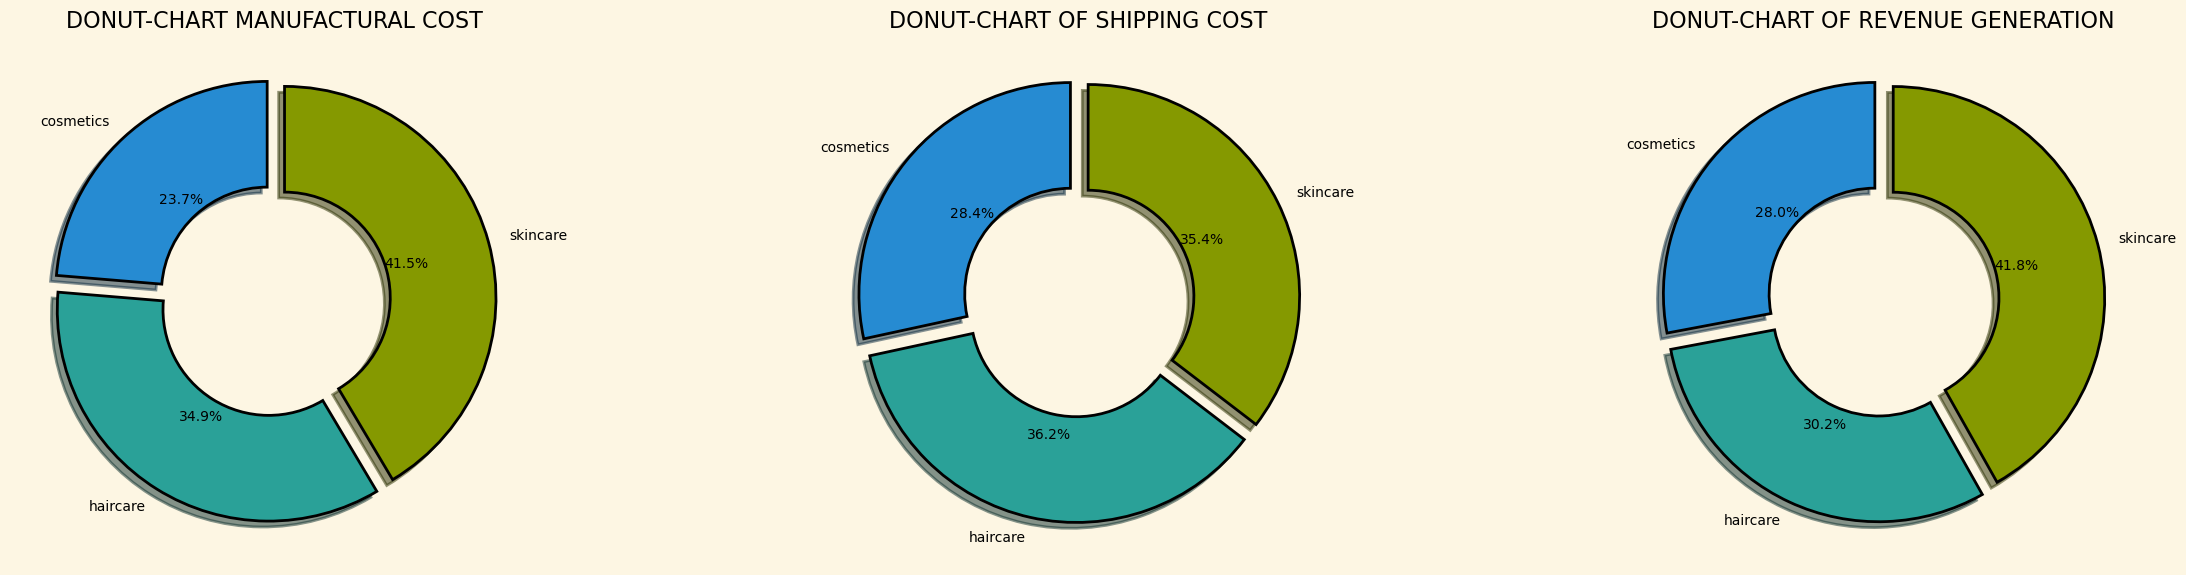

In [20]:
f, ax = plt.subplots(1, 3, figsize = (25, 6))

total_revenue = df.groupby('Product type')['Manufacturing costs'].sum().reset_index()

ax[0].pie(x=total_revenue['Manufacturing costs'],
         labels = total_revenue['Product type'],
         explode = [0.05, 0.05, 0.05],
         autopct='%1.1f%%',
         shadow=True,
         startangle=90, 
         wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5}
         )
ax[0].set_title("DONUT-CHART MANUFACTURAL COST")

total_revenue = df.groupby('Product type')['Shipping costs'].sum().reset_index()

ax[1].pie(x=total_revenue['Shipping costs'],
         labels = total_revenue['Product type'],
         explode = [0.05, 0.05, 0.05],
         autopct='%1.1f%%',
         shadow=True,
         startangle=90, 
         wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5}
         )
ax[1].set_title("DONUT-CHART OF SHIPPING COST")

total_revenue = df.groupby('Product type')['Revenue generated'].sum().reset_index()

ax[2].pie(x=total_revenue['Revenue generated'],
         labels = total_revenue['Product type'],
         explode = [0.05, 0.05, 0.05],
         autopct='%1.1f%%',
         shadow=True,
         startangle=90, 
         wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5}
         )
ax[2].set_title("DONUT-CHART OF REVENUE GENERATION")

plt.suptitle("", fontsize=17)
plt.tight_layout()
plt.show()

In [21]:
print(f"SKINCARE :- {round(41.5+35.4)/2}% < 41.8%")
print(f"COSMATICS :- {round(23.7+28.4)/2}% < 28%")
print(f"HAIRCARE :- {round(34.9+36.2)/2}% > 30.2%")


SKINCARE :- 38.5% < 41.8%
COSMATICS :- 26.0% < 28%
HAIRCARE :- 35.5% > 30.2%


As,  revenue is generated before deduction of all expenditure cost.
So for the above visuals we can conclude that skincare products and cosmatic products leads to more net profit than haircare 

In [22]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

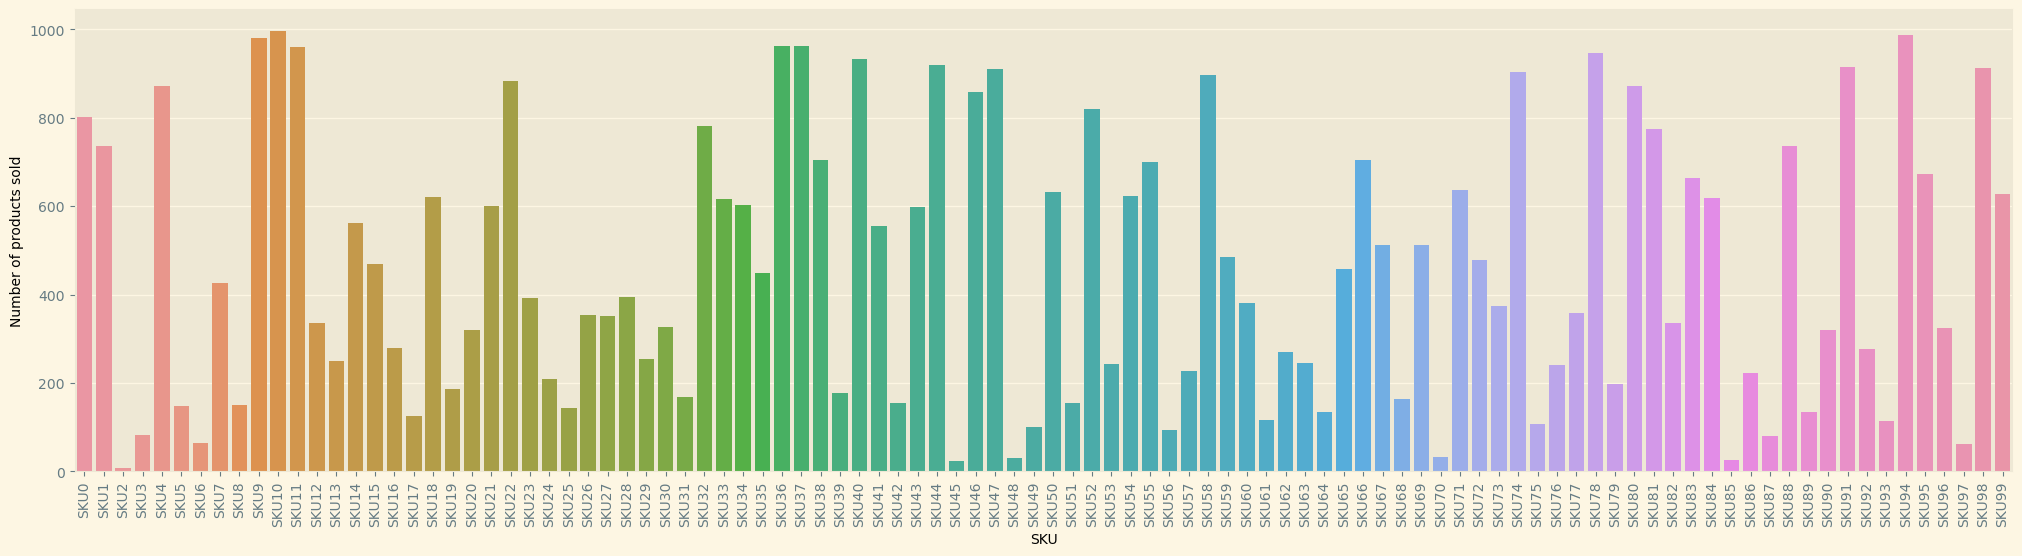

In [23]:
plt.figure(figsize=(25, 6))
sns.barplot(data=df,y='Number of products sold', x='SKU' )
plt.xticks(rotation=90)
plt.show()

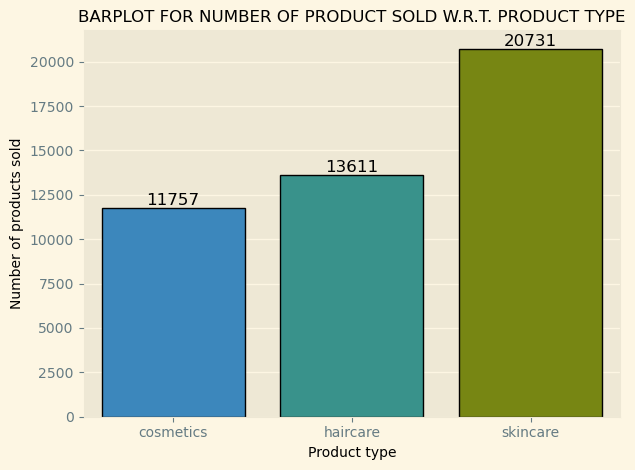

In [24]:
df_product = df.groupby('Product type')['Number of products sold'].sum().reset_index()

ax = sns.barplot(data=df_product, x='Product type', y='Number of products sold', edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, color='black', size=12,  fmt='%.0f')
ax.set_title("BARPLOT FOR NUMBER OF PRODUCT SOLD W.R.T. PRODUCT TYPE", fontsize = 12)

plt.tight_layout()
plt.show()

SKINCARE products have large number of sells

In [25]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [26]:
df['Location'].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

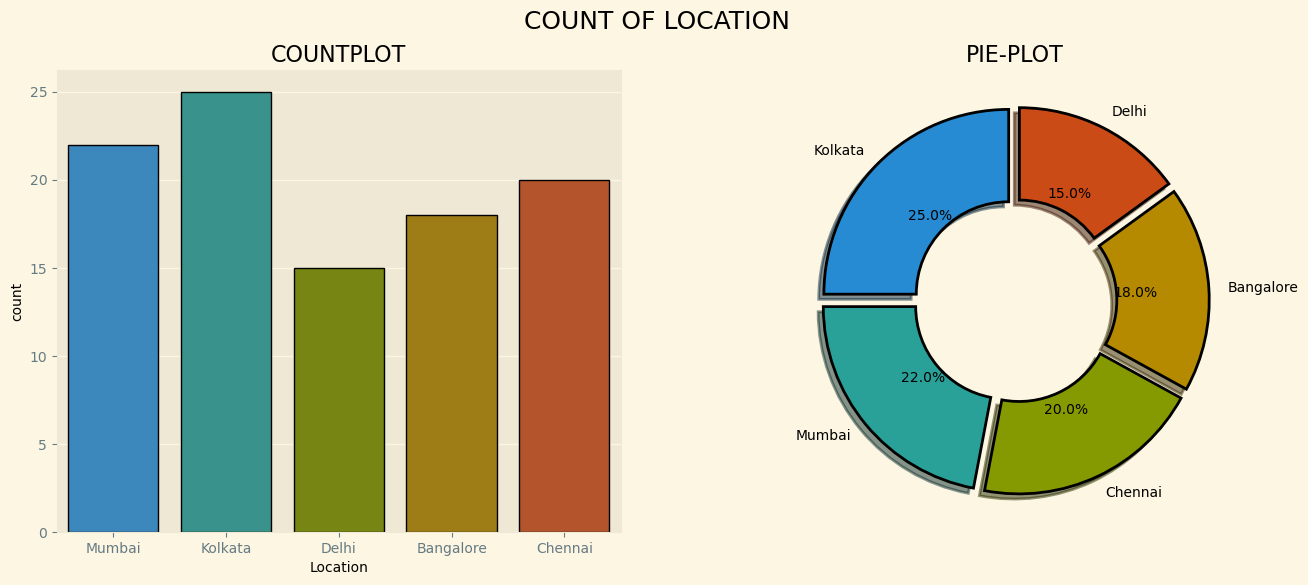

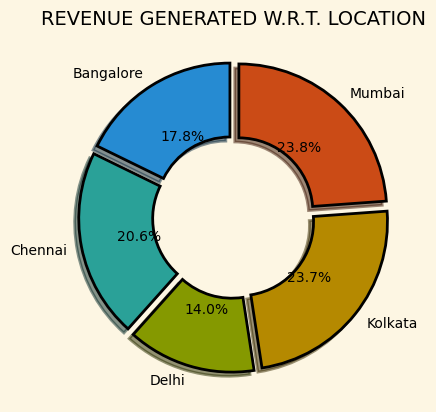

In [65]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df, x='Location', ax = ax[0], edgecolor='black')

ax[0].set_title("COUNTPLOT")

ax[1].pie(x=df['Location'].value_counts(), 
       labels=df['Location'].value_counts().index,
       explode = [0.05, 0.05, 0.05, 0.05, 0.05],
       shadow = True,
        autopct = '%1.1f%%',
       startangle=90,
       wedgeprops ={'edgecolor':'black', 'linewidth':2, 'width':0.5})
ax[1].set_title("PIE-PLOT")  
plt.suptitle("COUNT OF LOCATION", fontsize = 18)
plt.show()

location_revenue = df.groupby('Location')['Revenue generated'].sum().reset_index()
plt.pie(x=location_revenue['Revenue generated'],
          labels=location_revenue['Location'],
         explode=[0.05, 0.05, 0.05, 0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})


plt.title("REVENUE GENERATED W.R.T. LOCATION", fontsize=14)
plt.show()

CONCLUSION:-

    23.8% revenue is generated from MUMBAI
    23.7% revenue is generated from KOLKATA
    14.0% revenue is generated from DELHI
    20.6% revenue is generated from CHENNAI
    17.8% revenue is generated from BANGALORE

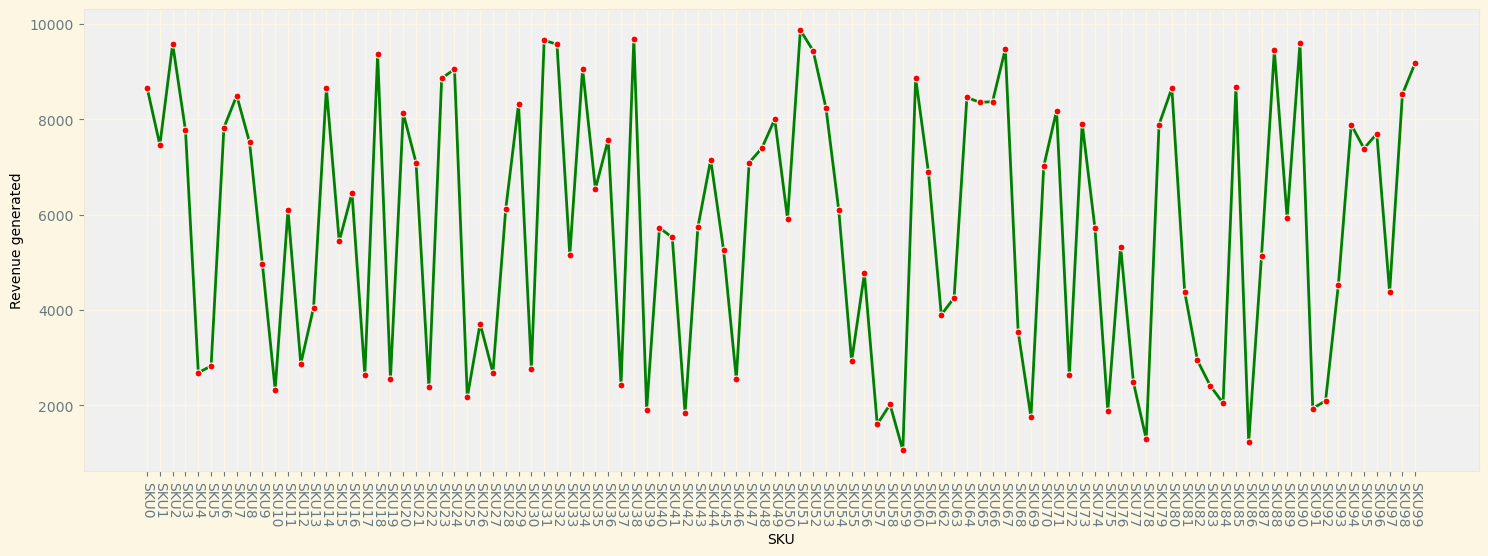

In [80]:
plt.figure(figsize = (18, 6))
sns.lineplot(data=df, x='SKU', y='Revenue generated', marker='o', color='green'
                                             , markersize=5, markerfacecolor='red')
plt.xticks(rotation=270)
plt.gca().set_facecolor('#f0f0f0')
plt.show()

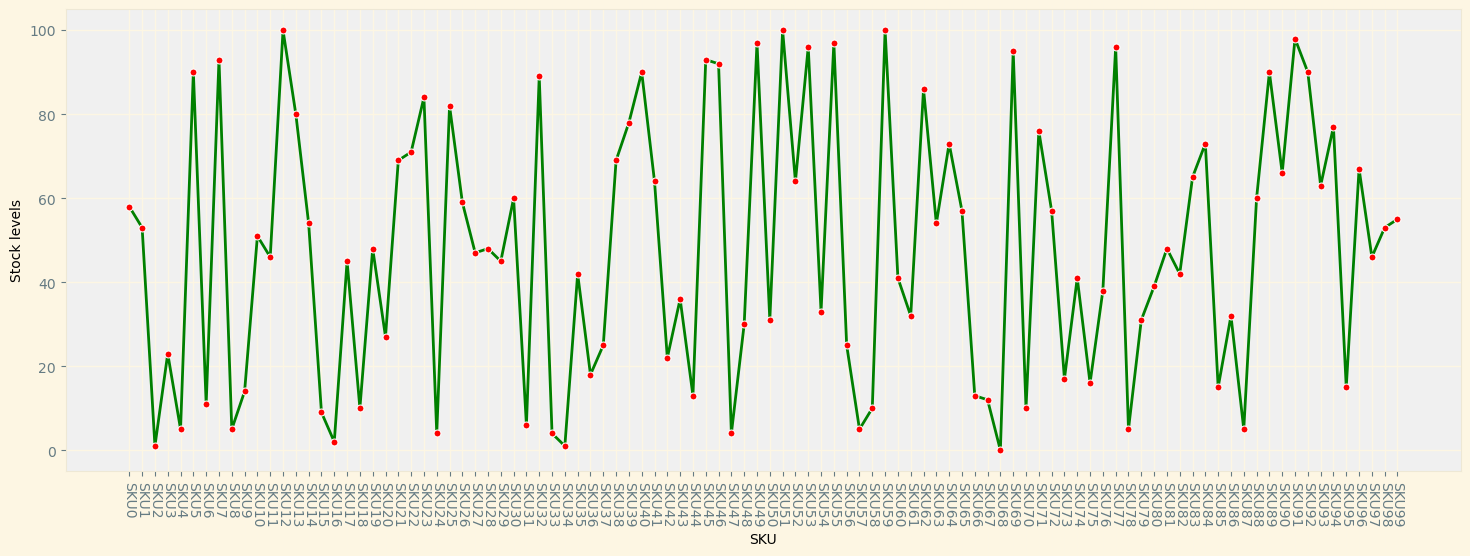

In [82]:
plt.figure(figsize = (18, 6))
sns.lineplot(data=df, x='SKU', y='Stock levels', marker='o', color='green'
                                             , markersize=5, markerfacecolor='red')
plt.xticks(rotation=270)
plt.gca().set_facecolor('#f0f0f0')
plt.show()

In [81]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')